In [8]:
import pandas as pd
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from datetime import datetime
import json
%matplotlib inline
pd.options.display.float_format = '{:.2f}'.format

In [9]:
#reading the dataset
data = pd.read_csv("WA_Fn-UseC_-Marketing-Customer-Value-Analysis.csv")
data

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.52,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.81,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.54,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.46,Four-Door Car,Medsize
2,AI49188,Nevada,12887.43,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.47,Two-Door Car,Medsize
3,WW63253,California,7645.86,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.88,SUV,Medsize
4,HB64268,Washington,2813.69,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.13,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.99,No,Basic,Bachelor,2/10/11,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.23,Four-Door Car,Medsize
9130,PK87824,California,3096.51,Yes,Extended,College,2/12/11,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.20,Four-Door Car,Medsize
9131,TD14365,California,8163.89,No,Extended,Bachelor,2/6/11,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.78,Four-Door Car,Medsize
9132,UP19263,California,7524.44,No,Extended,College,2/3/11,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.20,Four-Door Car,Large


In [10]:
### Data preprocessing

In [11]:
data['Effective To Date']= data['Effective To Date'].astype('datetime64[ns]')


In [13]:
data.isnull().sum()

Customer                         0
State                            0
Customer Lifetime Value          0
Response                         0
Coverage                         0
Education                        0
Effective To Date                0
EmploymentStatus                 0
Gender                           0
Income                           0
Location Code                    0
Marital Status                   0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Policy Type                      0
Policy                           0
Renew Offer Type                 0
Sales Channel                    0
Total Claim Amount               0
Vehicle Class                    0
Vehicle Size                     0
dtype: int64

In [12]:
# Searching for NaN values
dropnans = data.dropna()
dropnans

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.52,No,Basic,Bachelor,2011-02-24,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.81,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.54,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.46,Four-Door Car,Medsize
2,AI49188,Nevada,12887.43,No,Premium,Bachelor,2011-02-19,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.47,Two-Door Car,Medsize
3,WW63253,California,7645.86,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.88,SUV,Medsize
4,HB64268,Washington,2813.69,No,Basic,Bachelor,2011-02-03,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.13,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.99,No,Basic,Bachelor,2011-02-10,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.23,Four-Door Car,Medsize
9130,PK87824,California,3096.51,Yes,Extended,College,2011-02-12,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.20,Four-Door Car,Medsize
9131,TD14365,California,8163.89,No,Extended,Bachelor,2011-02-06,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.78,Four-Door Car,Medsize
9132,UP19263,California,7524.44,No,Extended,College,2011-02-03,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.20,Four-Door Car,Large


['Customer Lifetime Value', 'Income', 'Monthly Premium Auto', 'Months Since Last Claim', 'Months Since Policy Inception', 'Number of Open Complaints', 'Number of Policies', 'Total Claim Amount']


<Figure size 640x480 with 0 Axes>

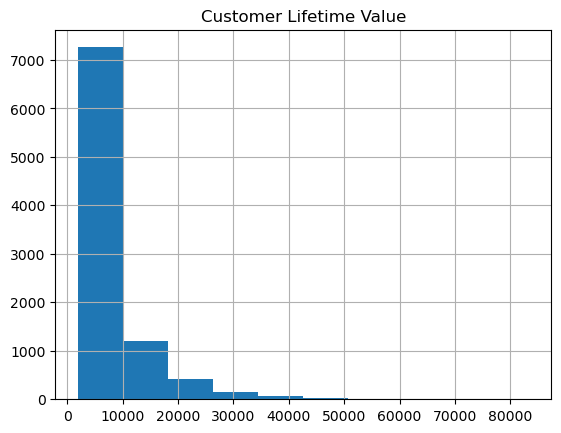

<Figure size 640x480 with 0 Axes>

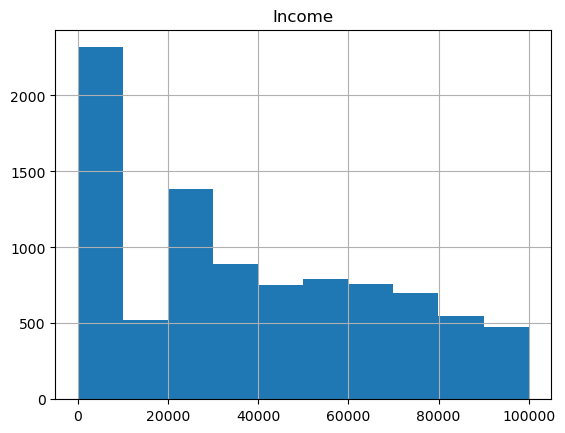

<Figure size 640x480 with 0 Axes>

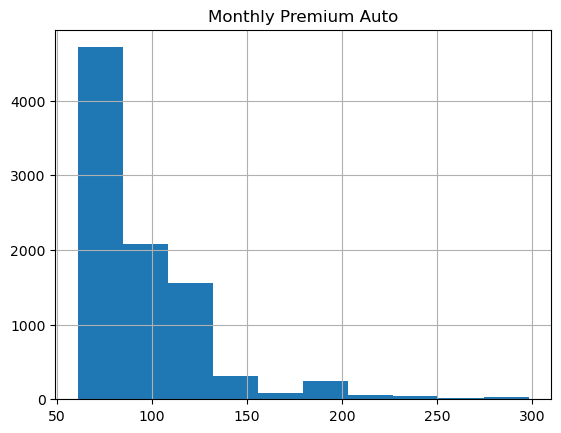

<Figure size 640x480 with 0 Axes>

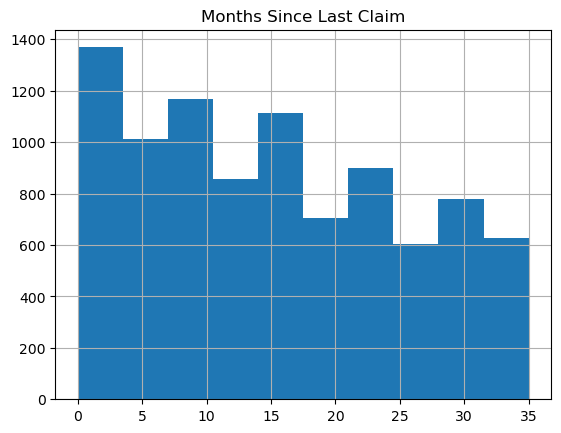

<Figure size 640x480 with 0 Axes>

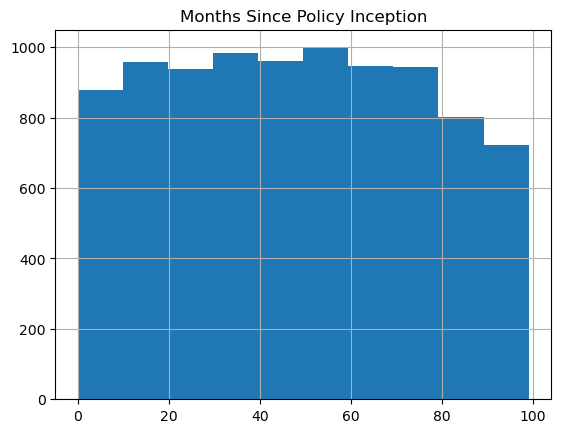

<Figure size 640x480 with 0 Axes>

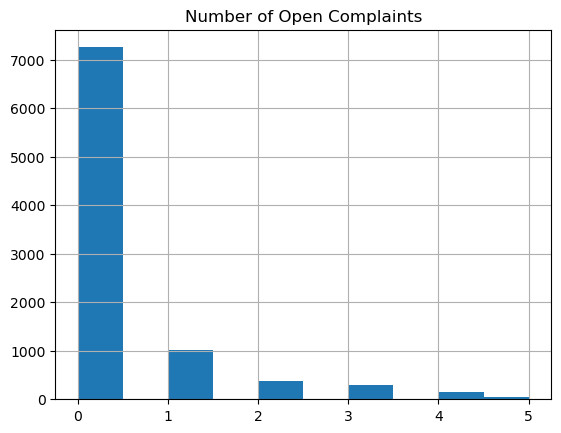

<Figure size 640x480 with 0 Axes>

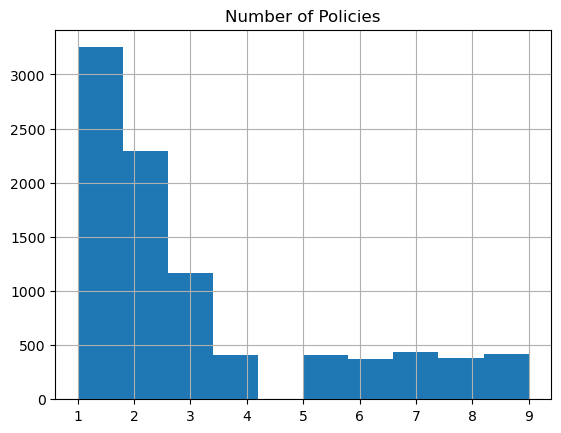

<Figure size 640x480 with 0 Axes>

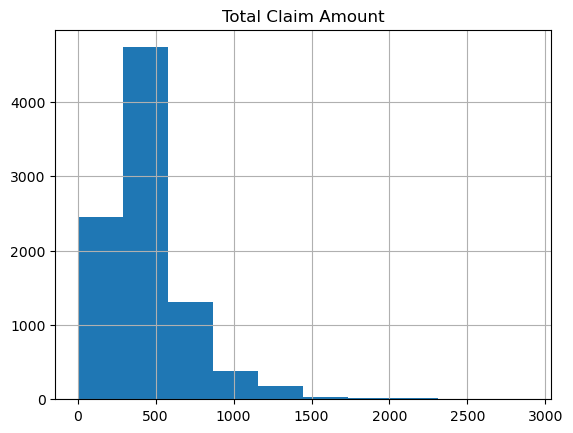

In [6]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numeric_columns = list(data.select_dtypes(include=numerics).columns)
print(numeric_columns)
for i in numeric_columns:
  plt.figure()
  data.hist([i])

In [7]:
data.columns

Index(['Customer', 'State', 'Customer Lifetime Value', 'Response', 'Coverage',
       'Education', 'Effective To Date', 'EmploymentStatus', 'Gender',
       'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size'],
      dtype='object')

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

## EDA

In [16]:
data.describe()

,Customer_Lifetime_Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
count,9134.00,9134.00,9134.00,9134.00,9134.00,9134.00,9134.00,9134.00
mean,8004.94,37657.38,93.22,15.10,48.06,0.38,2.97,434.09
std,6870.97,30379.90,34.41,10.07,27.91,0.91,2.39,290.50
min,1898.01,0.00,61.00,0.00,0.00,0.00,1.00,0.10
25%,3994.25,0.00,68.00,6.00,24.00,0.00,1.00,272.26
50%,5780.18,33889.50,83.00,14.00,48.00,0.00,2.00,383.95
75%,8962.17,62320.00,109.00,23.00,71.00,0.00,4.00,547.51
max,83325.38,99981.00,298.00,35.00,99.00,5.00,9.00,2893.24


In [17]:
data.columns

Index(['Customer', 'State', 'Customer_Lifetime_Value', 'Response', 'Coverage',
       'Education', 'Effective To Date', 'EmploymentStatus', 'Gender',
       'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size'],
      dtype='object')

In [14]:
data.drop_duplicates()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.52,No,Basic,Bachelor,2011-02-24,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.81,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.54,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.46,Four-Door Car,Medsize
2,AI49188,Nevada,12887.43,No,Premium,Bachelor,2011-02-19,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.47,Two-Door Car,Medsize
3,WW63253,California,7645.86,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.88,SUV,Medsize
4,HB64268,Washington,2813.69,No,Basic,Bachelor,2011-02-03,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.13,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.99,No,Basic,Bachelor,2011-02-10,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.23,Four-Door Car,Medsize
9130,PK87824,California,3096.51,Yes,Extended,College,2011-02-12,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.20,Four-Door Car,Medsize
9131,TD14365,California,8163.89,No,Extended,Bachelor,2011-02-06,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.78,Four-Door Car,Medsize
9132,UP19263,California,7524.44,No,Extended,College,2011-02-03,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.20,Four-Door Car,Large


In [10]:
print(data.head())
print(data.info())
print(data.describe())
print(data.isnull().sum())



  Customer       State  Customer Lifetime Value Response  Coverage Education  \
0  BU79786  Washington              2763.519279       No     Basic  Bachelor   
1  QZ44356     Arizona              6979.535903       No  Extended  Bachelor   
2  AI49188      Nevada             12887.431650       No   Premium  Bachelor   
3  WW63253  California              7645.861827       No     Basic  Bachelor   
4  HB64268  Washington              2813.692575       No     Basic  Bachelor   

  Effective To Date EmploymentStatus Gender  Income  ...  \
0           2/24/11         Employed      F   56274  ...   
1           1/31/11       Unemployed      F       0  ...   
2           2/19/11         Employed      F   48767  ...   
3           1/20/11       Unemployed      M       0  ...   
4            2/3/11         Employed      M   43836  ...   

  Months Since Policy Inception Number of Open Complaints  Number of Policies  \
0                             5                         0                   1

<AxesSubplot:ylabel='None'>

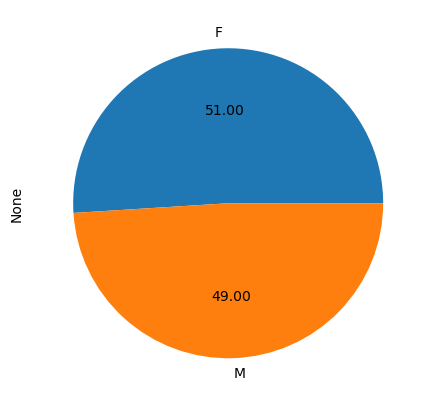

In [18]:
plt.figure(figsize=(5,10))
data.groupby('Gender').size().plot(kind='pie', autopct='%.2f')

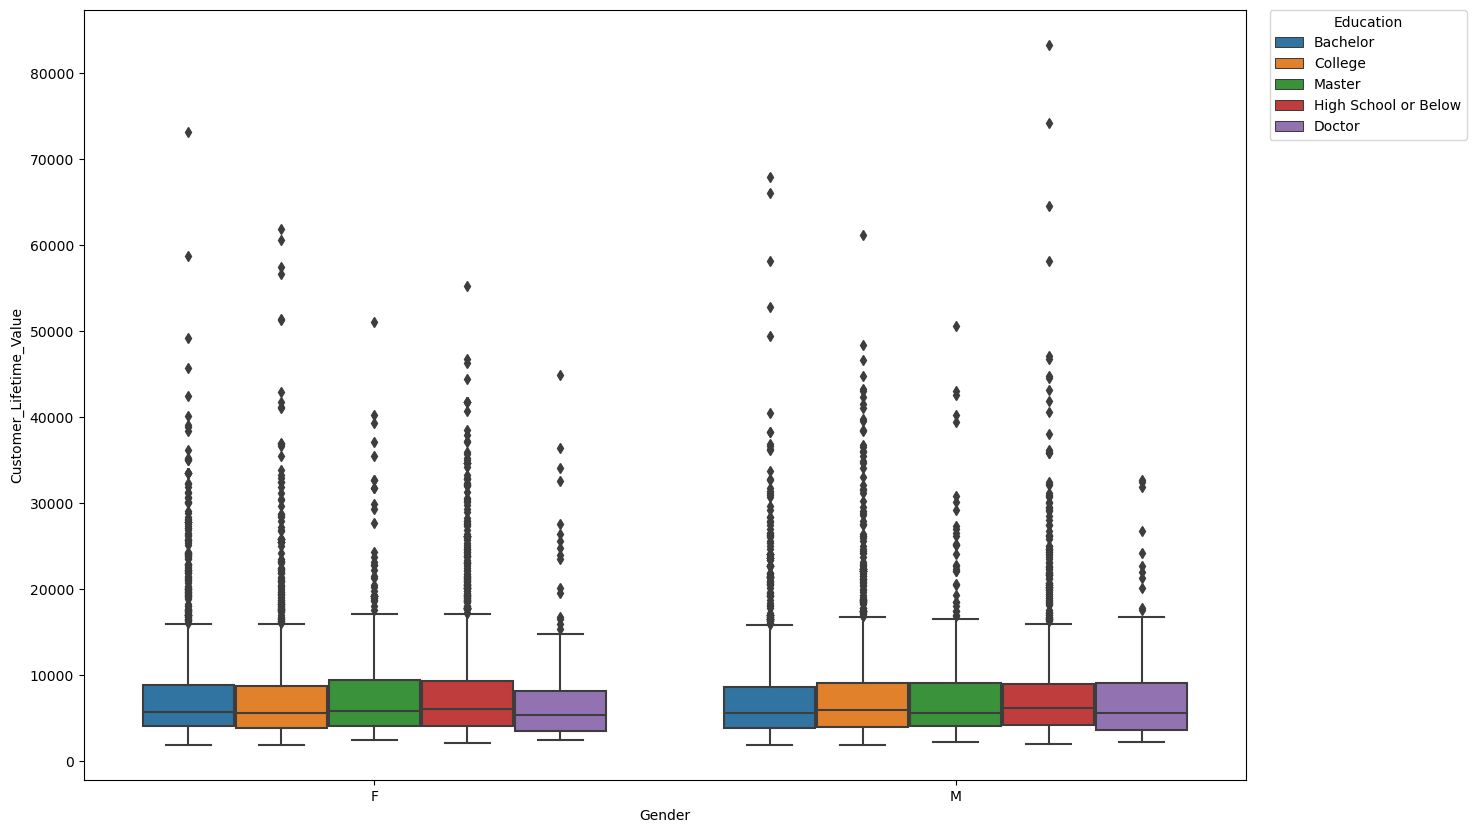

In [19]:
plt.figure(figsize=(15,10))
sns.boxplot(x ='Gender', y ='Customer_Lifetime_Value', data = data, hue ='Education')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, title='Education')

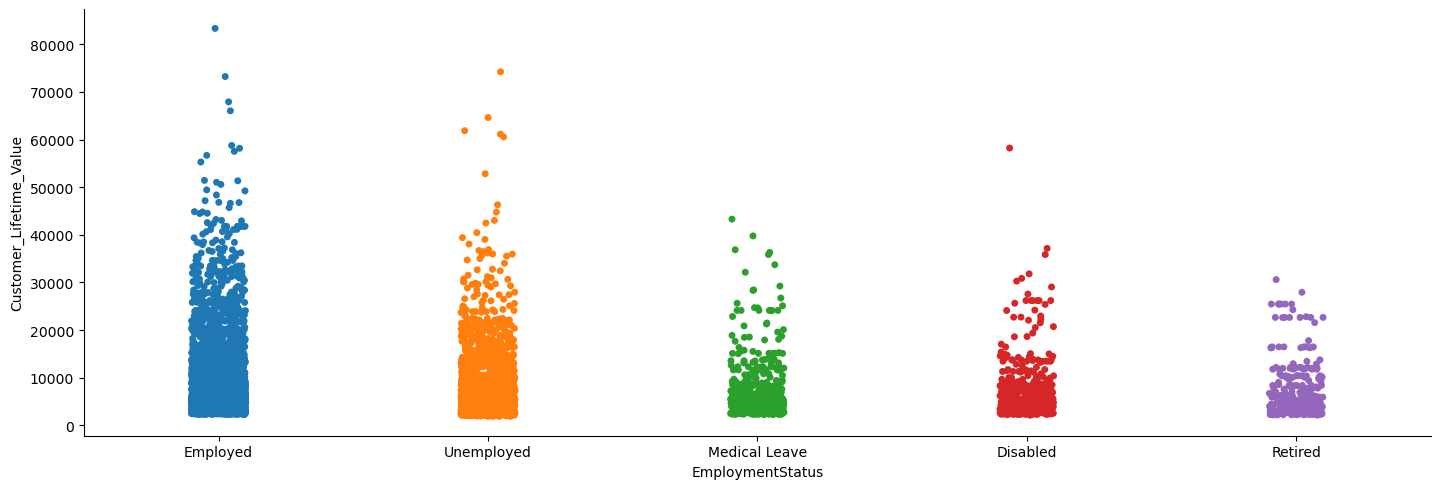

In [20]:
g = sns.catplot(x="EmploymentStatus", y="Customer_Lifetime_Value", data=data)
g.fig.set_size_inches(17,5)

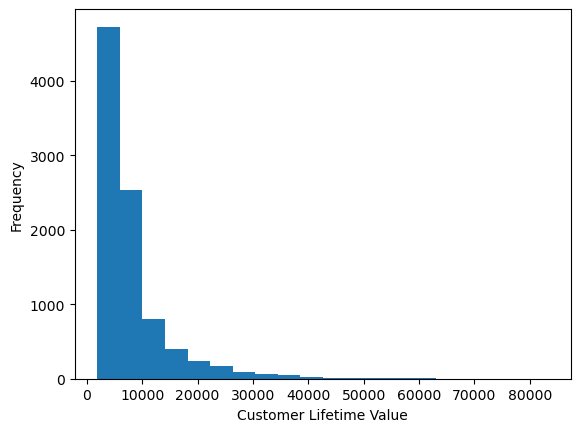

In [11]:

plt.hist(data['Customer Lifetime Value'], bins=20)
plt.xlabel('Customer Lifetime Value')
plt.ylabel('Frequency')
plt.show()

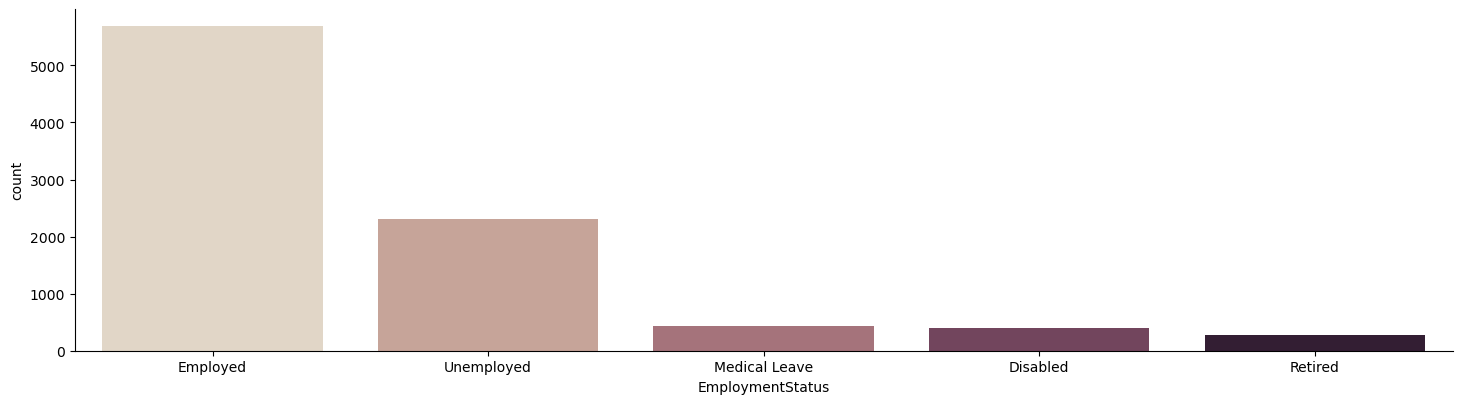

In [23]:
g = sns.catplot(x="EmploymentStatus", kind="count", palette="ch:.25", data=data)
g.fig.set_size_inches(17,4)

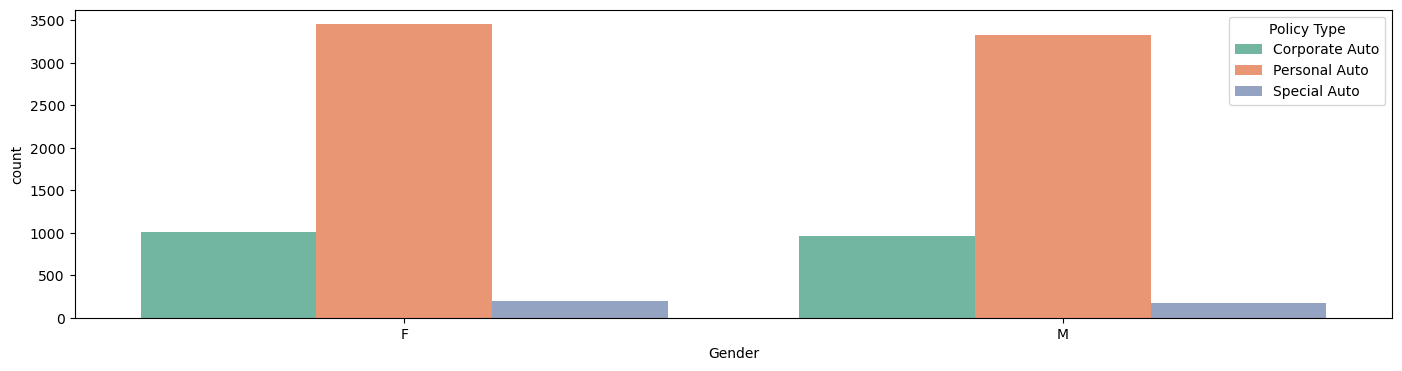

In [24]:
plt.figure(figsize=(17, 4))
g = sns.countplot(x ='Gender', hue = "Policy Type", data = data, palette = "Set2")

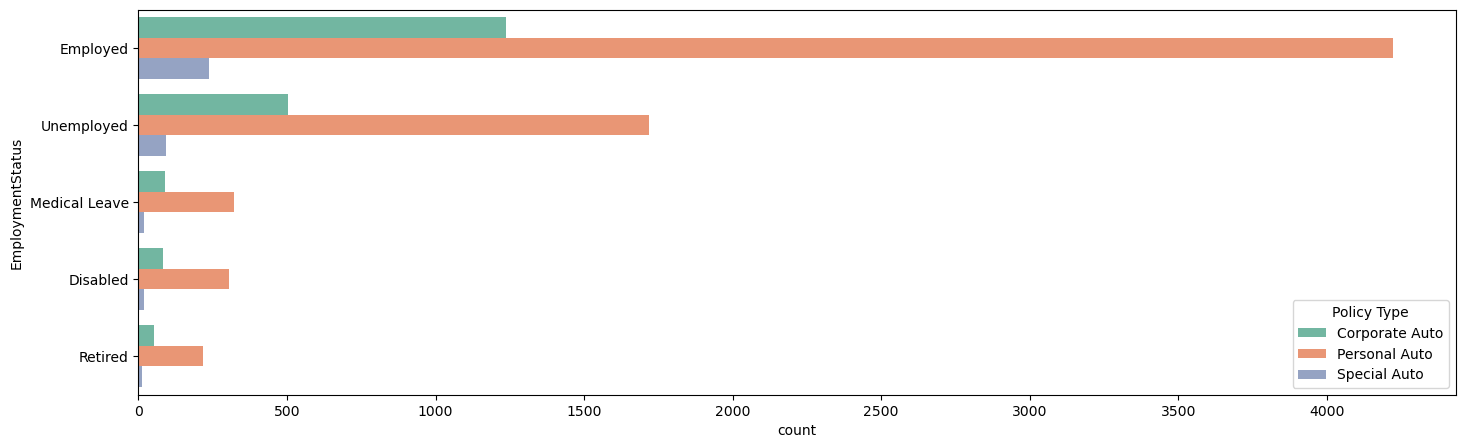

In [25]:
plt.figure(figsize=(17, 5))
g = sns.countplot(y ='EmploymentStatus', hue = "Policy Type", data = data, palette = "Set2")

In [26]:
dept_gender_salary =  data.groupby(['EmploymentStatus','Gender'],as_index=False).Customer_Lifetime_Value.mean()
print(dept_gender_salary)

  EmploymentStatus Gender  Customer_Lifetime_Value
0         Disabled      F                  7849.25
1         Disabled      M                  7845.82
2         Employed      F                  8440.17
3         Employed      M                  7983.97
4    Medical Leave      F                  6921.10
5    Medical Leave      M                  8349.32
6          Retired      F                  7527.80
7          Retired      M                  7454.67
8       Unemployed      F                  7546.52
9       Unemployed      M                  7722.55


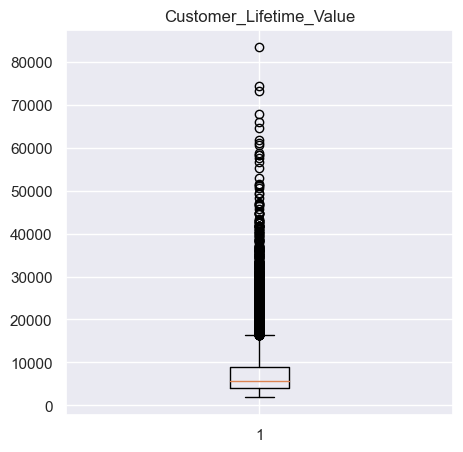

In [27]:
columns = ['Customer_Lifetime_Value']
sns.set(color_codes=True)
plt.figure(figsize=(5,5))
plt.subplots_adjust(hspace=0.5)
plt.subplot(1,1,1)
plt.boxplot(data[columns[0]])
plt.title(columns[0])
plt.show()

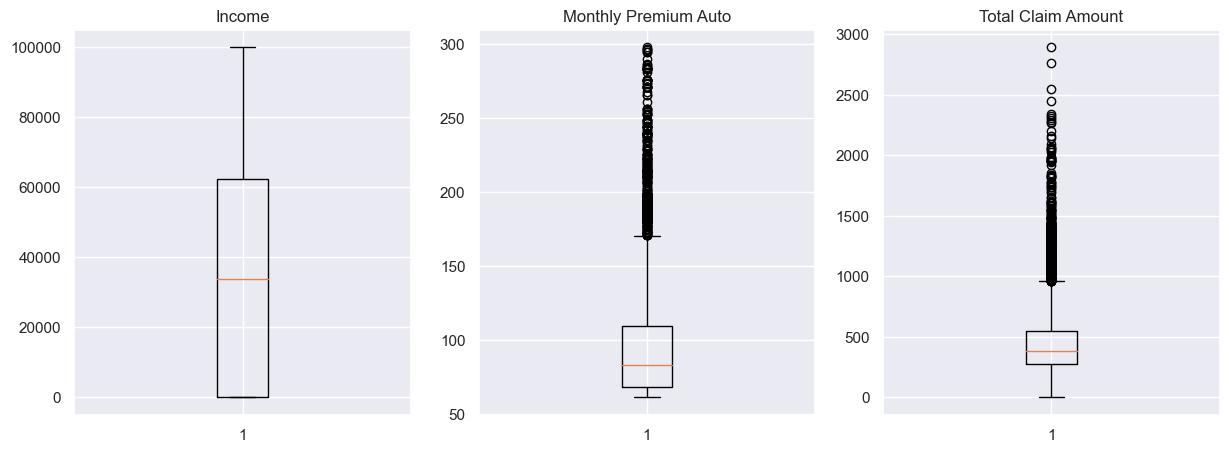

In [28]:
columns = ['Income','Monthly Premium Auto','Total Claim Amount']
sns.set(color_codes=True)
plt.figure(figsize=(20,5))
plt.subplots_adjust(hspace=0.5)
for i in range(len(columns)):
    plt.subplot(1,4,i+1)
    plt.boxplot(data[columns[i]])
    plt.title(columns[i])
plt.show()

<Figure size 640x480 with 0 Axes>

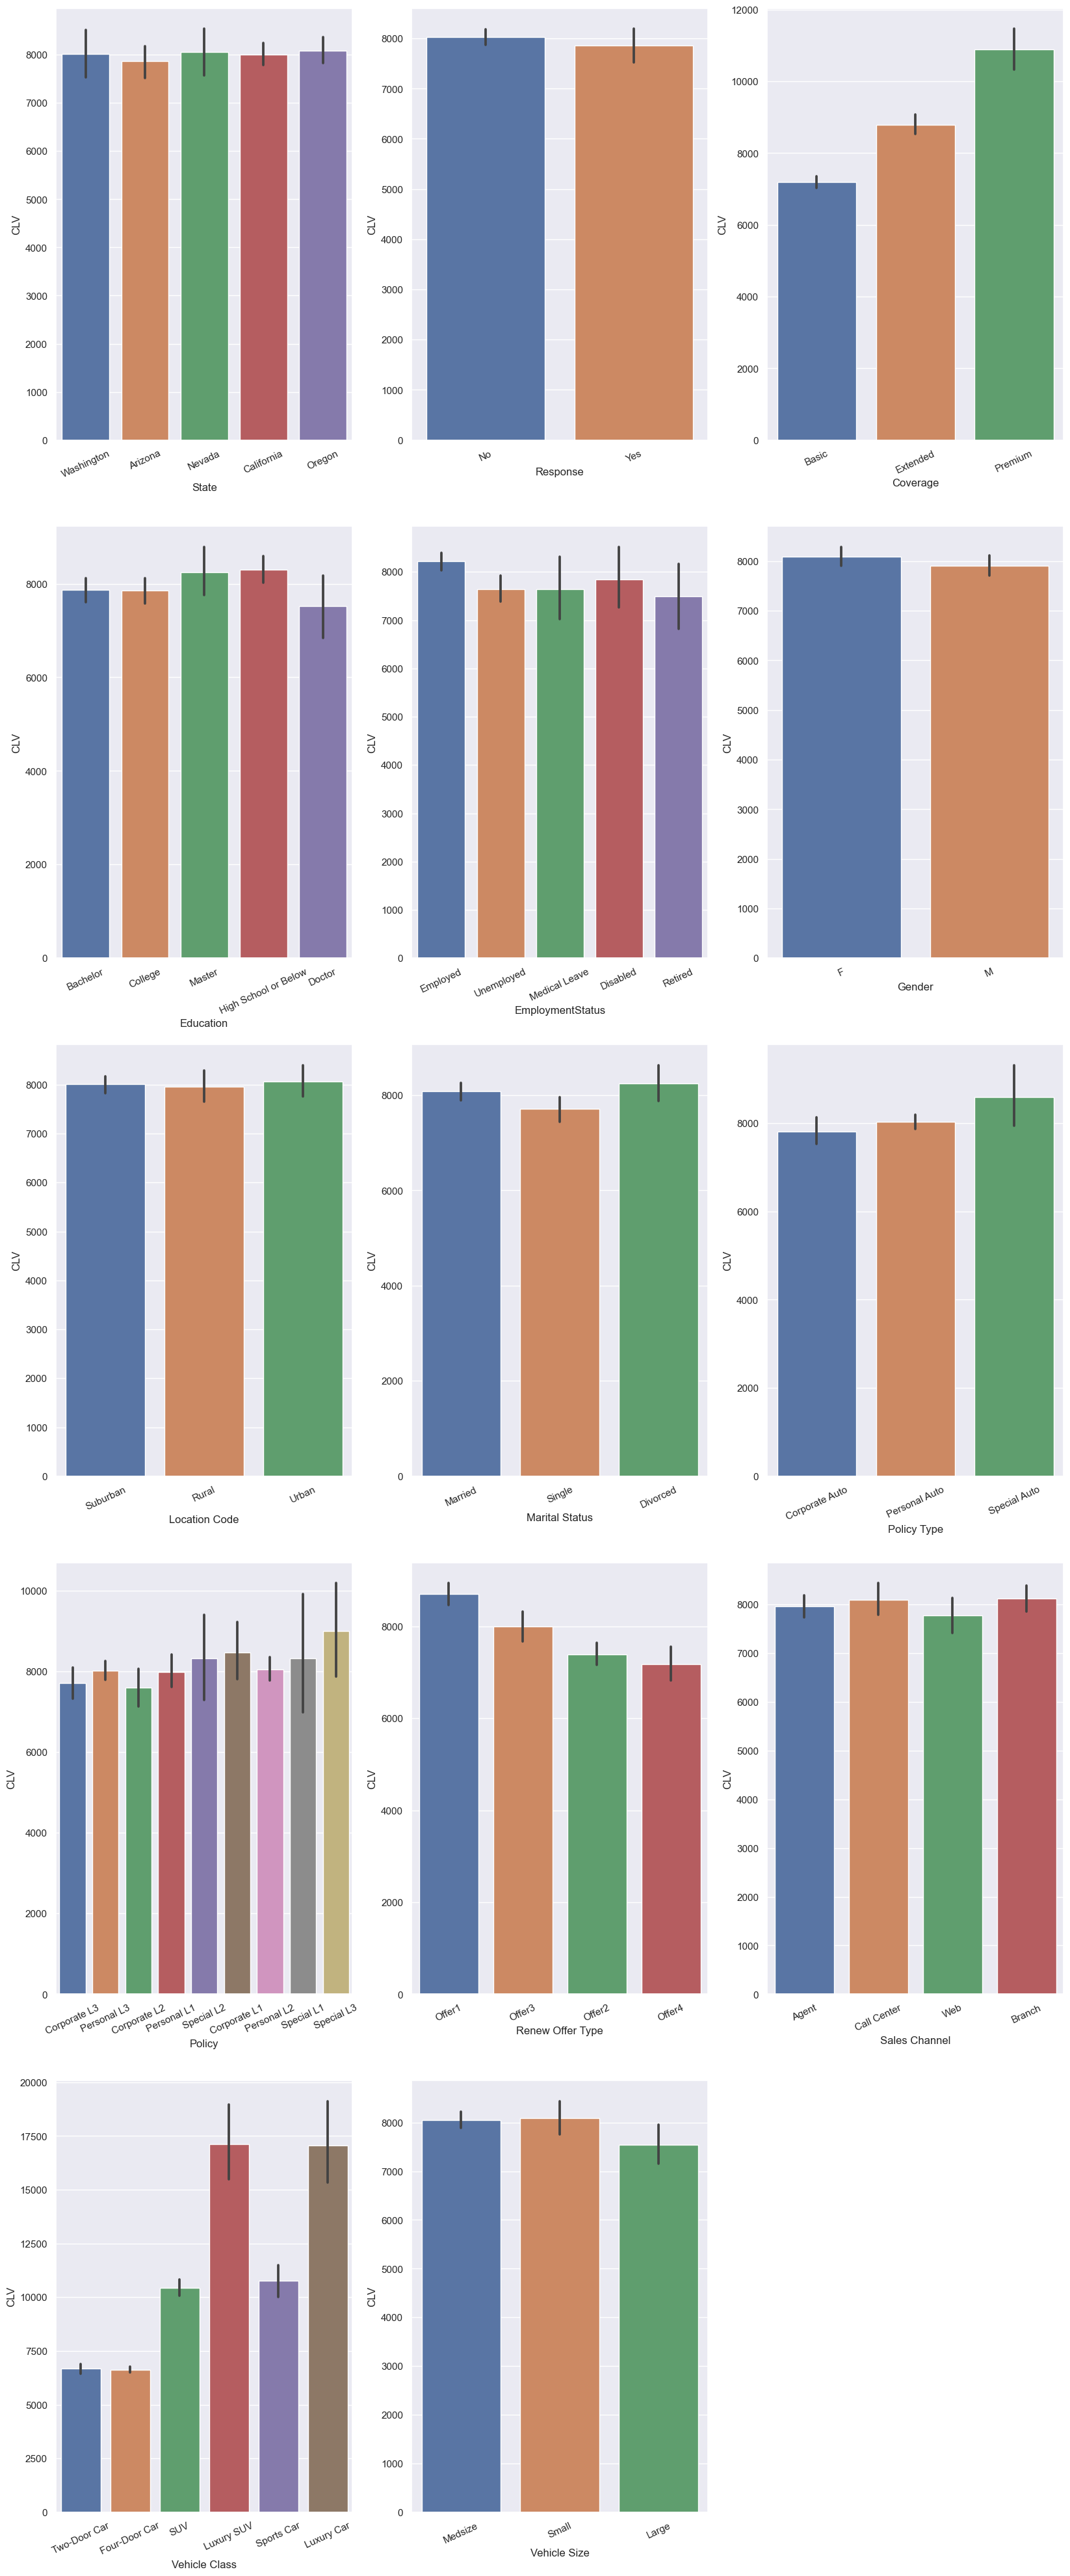

In [29]:
catogorical_data = data.select_dtypes(include='object')
catogorical_data = catogorical_data.drop(['Customer'], axis = 1)
columns = catogorical_data.columns
sns.set(color_codes=True)
plt.subplots_adjust(hspace=0.7)
plt.figure(figsize=(20,50))
for i in range(len(columns)):
    plt.subplot(5,3,i+1)
    sns.barplot(x = columns[i],y='Customer_Lifetime_Value',data = data)
    plt.ylabel('CLV')
    plt.xticks(rotation=25)
plt.show()

In [30]:
#Removing columns with less importance with respect to CLV
data.drop(['State','Coverage','Renew Offer Type','Vehicle Class','Customer','Response','Gender','Location Code','Vehicle Size','Policy','Policy Type','Sales Channel','Effective To Date'],axis=1,inplace = True)

In [31]:
#mapping categorical values to numerics
Education_map = {'Bachelor':1, 'College':2, 'Master':3, 'High School or Below':4, 'Doctor':5}
data['Education'] = data['Education'].map(Education_map)
EmploymentStatus_map = {'Employed':1, 'Unemployed':2, 'Medical Leave':3, 'Disabled':4, 'Retired':5}
data['EmploymentStatus'] = data['EmploymentStatus'].map(EmploymentStatus_map)
MaritalStatus_map = {'Married':1, 'Single':2, 'Divorced':3}
data['Marital Status'] = data['Marital Status'].map(MaritalStatus_map)

In [32]:
data['Marital Status'].unique()


array([1, 2, 3], dtype=int64)

In [34]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,r2_score
import statsmodels.api as sm

In [39]:
data = pd.read_csv("WA_Fn-UseC_-Marketing-Customer-Value-Analysis.csv")
data

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.52,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.81,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.54,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.46,Four-Door Car,Medsize
2,AI49188,Nevada,12887.43,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.47,Two-Door Car,Medsize
3,WW63253,California,7645.86,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.88,SUV,Medsize
4,HB64268,Washington,2813.69,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.13,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.99,No,Basic,Bachelor,2/10/11,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.23,Four-Door Car,Medsize
9130,PK87824,California,3096.51,Yes,Extended,College,2/12/11,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.20,Four-Door Car,Medsize
9131,TD14365,California,8163.89,No,Extended,Bachelor,2/6/11,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.78,Four-Door Car,Medsize
9132,UP19263,California,7524.44,No,Extended,College,2/3/11,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.20,Four-Door Car,Large


In [36]:

object_cols = data.select_dtypes(include='object').columns
data[object_cols] = data[object_cols].astype('float64')

In [40]:

X = data.drop(['Customer','Effective To Date','Customer Lifetime Value'], axis=1)
y = data['Customer Lifetime Value']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

In [ ]:

model = sm.GLM(y_train, X_train,family=sm.families.Gaussian(link=sm.families.links.log()))
glm_results = model.fit()


print(glm_results.summary())

                    Generalized Linear Model Regression Results                    
Dep. Variable:     Customer Lifetime Value   No. Observations:                 6850
Model:                                 GLM   Df Residuals:                     6828
Model Family:                     Gaussian   Df Model:                           21
Link Function:                         log   Scale:                      3.8451e+07
Method:                               IRLS   Log-Likelihood:                -69526.
Date:                     Mon, 17 Jul 2023   Deviance:                   2.6255e+11
Time:                             18:33:45   Pearson chi2:                 2.63e+11
No. Iterations:                         11   Pseudo R-squ. (CS):             0.1700
Covariance Type:                 nonrobust                                         
                                    coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------

In [ ]:
print(glm_results.summary())


y_pred = glm_results.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error (MSE):', mean_squared_error(y_test, y_pred))

                    Generalized Linear Model Regression Results                    
Dep. Variable:     Customer Lifetime Value   No. Observations:                 6850
Model:                                 GLM   Df Residuals:                     6828
Model Family:                     Gaussian   Df Model:                           21
Link Function:                         log   Scale:                      3.8451e+07
Method:                               IRLS   Log-Likelihood:                -69526.
Date:                     Mon, 17 Jul 2023   Deviance:                   2.6255e+11
Time:                             18:33:51   Pearson chi2:                 2.63e+11
No. Iterations:                         11   Pseudo R-squ. (CS):             0.1700
Covariance Type:                 nonrobust                                         
                                    coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------

In [ ]:
rmse = np.sqrt(mse)
rmse

6696.322886966455

In [ ]:
from statsmodels.tools.eval_measures import rmse
r = rmse(y_test, y_pred)
r

6696.322886966455

In [ ]:

print(glm_results.summary())


y_pred = glm_results.predict(X_test)

print('Mean Squared Error (MSE):', mean_squared_error(y_test, y_pred))
print('R-squared:', r2_score(y_test, y_pred))


                    Generalized Linear Model Regression Results                    
Dep. Variable:     Customer Lifetime Value   No. Observations:                 6850
Model:                                 GLM   Df Residuals:                     6828
Model Family:                     Gaussian   Df Model:                           21
Link Function:                         log   Scale:                      3.8451e+07
Method:                               IRLS   Log-Likelihood:                -69526.
Date:                     Mon, 17 Jul 2023   Deviance:                   2.6255e+11
Time:                             18:35:59   Pearson chi2:                 2.63e+11
No. Iterations:                         11   Pseudo R-squ. (CS):             0.1700
Covariance Type:                 nonrobust                                         
                                    coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------

In [ ]:
# NEW SECTION 2

y_test

2778     4111.888285
331      8610.667489
4794    10426.085510
1355     3530.007745
7609    17208.056420
            ...     
3770     9156.272726
5551    13037.033390
8686     5194.654884
3138     4897.041423
8780     8262.629249
Name: Customer Lifetime Value, Length: 2284, dtype: float64

In [ ]:
X_train_v1, X_test_v1, y_tain_v1, y_test_v1 = X_train.copy(), X_test.copy(), y_train.copy(), y_test.copy()


In [ ]:
# Calculate the variance of each feature
X_train_v1.var(axis=0)

State                            1.659891e+00
Response                         1.233444e-01
Coverage                         4.316641e-01
Education                        1.915877e+00
EmploymentStatus                 1.814515e+00
Gender                           2.499697e-01
Income                           9.258178e+08
Location Code                    3.671331e-01
Marital Status                   3.992143e-01
Monthly Premium Auto             1.211811e+03
Months Since Last Claim          1.006662e+02
Months Since Policy Inception    7.836000e+02
Number of Open Complaints        8.312604e-01
Number of Policies               5.775127e+00
Policy Type                      2.252384e-01
Policy                           2.564345e+00
Renew Offer Type                 1.020276e+00
Sales Channel                    1.140428e+00
Total Claim Amount               8.587773e+04
Vehicle Class                    4.279799e+00
Vehicle Size                     2.906114e-01
dtype: float64

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaled_X_train_v1 = scaler.fit_transform(X_train_v1)

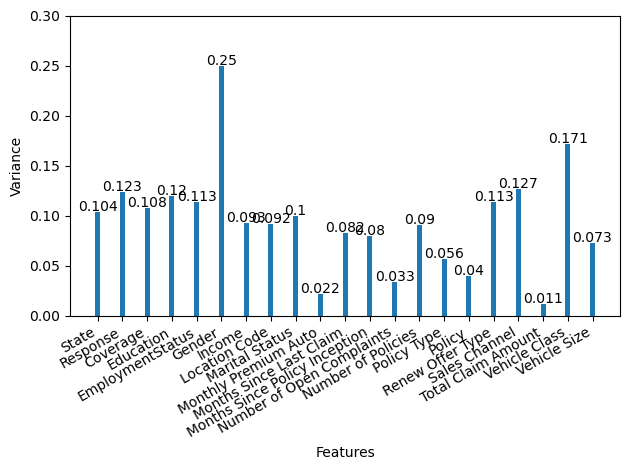

In [ ]:
fig, ax = plt.subplots()

x = X.columns
y = scaled_X_train_v1.var(axis=0)

ax.bar(x, y, width=0.2)
ax.set_xlabel('Features')
ax.set_ylabel('Variance')
ax.set_ylim(0, 0.3)

for index, value in enumerate(y):
    plt.text(x=index, y=value+0.001, s=str(round(value, 3)), ha='center')

fig.autofmt_xdate()
plt.tight_layout()

In [ ]:
x

Index(['State', 'Response', 'Coverage', 'Education', 'EmploymentStatus',
       'Gender', 'Income', 'Location Code', 'Marital Status',
       'Monthly Premium Auto', 'Months Since Last Claim',
       'Months Since Policy Inception', 'Number of Open Complaints',
       'Number of Policies', 'Policy Type', 'Policy', 'Renew Offer Type',
       'Sales Channel', 'Total Claim Amount', 'Vehicle Class', 'Vehicle Size'],
      dtype='object')

In [ ]:
X_train_v1 = X_train_v1.drop(['Total Claim Amount', 'Policy', 'Policy Type', 'Number of Open Complaints', 'Monthly Premium Auto'], axis=1)
X_test_v1 = X_test_v1.drop(['Total Claim Amount', 'Policy', 'Policy Type', 'Number of Open Complaints', 'Monthly Premium Auto'], axis=1)



In [ ]:
# Model fitting again
X_train = sm.add_constant(X_train_v1)
X_test = sm.add_constant(X_test_v1)

model = sm.GLM(y_train, X_train,family=sm.families.Gaussian(link=sm.families.links.log()))
glm_results = model.fit()


print(glm_results.summary())



                    Generalized Linear Model Regression Results                    
Dep. Variable:     Customer Lifetime Value   No. Observations:                 6850
Model:                                 GLM   Df Residuals:                     6833
Model Family:                     Gaussian   Df Model:                           16
Link Function:                         log   Scale:                      4.4883e+07
Method:                               IRLS   Log-Likelihood:                -70058.
Date:                     Mon, 17 Jul 2023   Deviance:                   3.0668e+11
Time:                             19:02:06   Pearson chi2:                 3.07e+11
No. Iterations:                         10   Pseudo R-squ. (CS):            0.04378
Covariance Type:                 nonrobust                                         
                                    coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------

In [ ]:

y_pred = glm_results.predict(X_test)
mse = mean_squared_error(y_test, y_pred)


In [ ]:
rmse = np.sqrt(mse)
rmse

6818.824510590331

In [38]:
import xgboost as xgb
#model = xgb.XGBClassifier()  #For Boruta
from sklearn.ensemble import RandomForestRegressor

# NEW SECTION

In [ ]:
y = data['Customer_Lifetime_Value']
x = data.drop('Customer_Lifetime_Value',axis=1)



In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25)
print('Train Data Count: {}'.format(x_train.shape[0]))
print('Test Data Count: {}'.format(x_test.shape[0]))

Train Data Count: 6850
Test Data Count: 2284


In [ ]:
#Linear Regression
LR = LinearRegression()
LR.fit(x_train,y_train)
y_prediction =  LR.predict(x_test)
r2score = r2_score(y_test,y_prediction)
print("R2 Score : ",r2score)

R2 Score :  0.12746879095587715


In [ ]:
new_data = data.copy()
new_data = new_data.drop('Customer_Lifetime_Value',axis=1)
#using log transformation
pol = PolynomialFeatures()
#eg for polynomial feature of degree 2 is [1,a,b,a^2,ab,b^2]

dat = pol.fit_transform(new_data)
#fit_transform() - Fit to data, then transform it
new_dat = pd.DataFrame(dat)
new_dat.columns = pol.get_feature_names(new_data.columns)
#get_feature_names() - Get output feature names for transformation

x =  new_dat
y = np.log(data['Customer_Lifetime_Value'])
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25)
print('Train Data Count: {}'.format(x_train.shape[0]))
print('Test Data Count: {}'.format(x_test.shape[0]))
#OLS
x_train = sm.add_constant(x_train)
glm = sm.GLM(y_train, x_train).fit()
x_test = sm.add_constant(x_test)
y_predictions = glm.predict(x_test)

glm.summary()



/Users/jainamshah/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Train Data Count: 6850
Test Data Count: 2284


<class 'statsmodels.iolib.summary.Summary'>
"""
                    Generalized Linear Model Regression Results                    
===================================================================================
Dep. Variable:     Customer_Lifetime_Value   No. Observations:                 6850
Model:                                 GLM   Df Residuals:                     6784
Model Family:                     Gaussian   Df Model:                           65
Link Function:                    identity   Scale:                         0.24547
Method:                               IRLS   Log-Likelihood:                -4875.8
Date:                     Tue, 27 Jun 2023   Deviance:                       1665.2
Time:                             11:30:21   Pearson chi2:                 1.67e+03
No. Iterations:                          3   Pseudo R-squ. (CS):             0.5204
Covariance Type:                 nonrobust                                         
===========================================================================================================================
                                                              coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------------
1                                                           6.8727      0.163     42.158      0.000       6.553       7.192
Education                                                   0.0161      0.037      0.437      0.662      -0.056       0.089
EmploymentStatus                                           -0.0925      0.064     -1.438      0.151      -0.219       0.034
Income                                                  -6.924e-07   2.71e-06     -0.256      0.798   -5.99e-06    4.61e-06
Marital Status                                             -0.1354      0.074     -1.839      0.066      -0.280       0.009
Monthly Premium Auto                                        0.0174      0.001     11.657      0.000       0.014       0.020
Months Since Last Claim                                     0.0071      0.004      1.800      0.072      -0.001       0.015
Months Since Policy Inception                              -0.0006      0.001     -0.433      0.665      -0.003       0.002
Number of Open Complaints                                   0.0270      0.042      0.642      0.521      -0.055       0.109
Number of Policies                                          0.5119      0.018     28.889      0.000       0.477       0.547
Total Claim Amount                                         -0.0001      0.000     -0.740      0.460      -0.001       0.000
Education^2                                                -0.0034      0.005     -0.712      0.476      -0.013       0.006
Education EmploymentStatus                                  0.0090      0.006      1.586      0.113      -0.002       0.020
Education Income                                         -3.04e-07   1.96e-07     -1.551      0.121   -6.88e-07    8.01e-08
Education Marital Status                                   -0.0024      0.006     -0.376      0.707      -0.015       0.010
Education Monthly Premium Auto                              0.0002      0.000      0.968      0.333      -0.000       0.001
Education Months Since Last Claim                          -0.0004      0.000     -0.779      0.436      -0.001       0.001
Education Months Since Policy Inception                     0.0001      0.000      0.664      0.507      -0.000       0.000
Education Number of Open Complaints                         0.0084      0.005      1.573      0.116      -0.002       0.019
Education Number of Policies                               -0.0012      0.002     -0.623      0.533      -0.005       0.003
Education Total Claim Amount                            -2.627e-05    2.4e-05     -1.093      0.275   -7.34e-05    2.09e-05
EmploymentStatus^2                                  